# Preprocess the data by segmenting the lung images

I will write them to a local directory.

In [ ]:
import importlib
from src.functions import segmenter
importlib.reload(segmenter)
from src.functions.segmenter import LungSegmenter

segment = LungSegmenter()

test = segment.segment_to_disk('data/train_segment', 'data/train') # Segment train data
segment.segment_to_disk('data/test', 'data/test_segment') # Segment test data

Using TensorFlow backend.
 23%|██▎       | 6068/26684 [47:58<3:28:36,  1.65it/s]

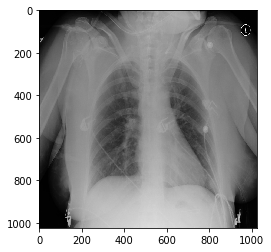

In [9]:
import cv2
import matplotlib.pyplot as plt

# segment._segment_to_disk(['data/train/a09ca982-3465-4346-a57c-16d0b9e150fd.png'], 'data/train_segment')
x = cv2.imread(test[1][0])
plt.imshow(x)

In [202]:
img_path = 'data/train/3d30e71a-b167-472f-80d9-d5d0a814a8ad.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [216]:
cv2.imread('data/train_segment/a09ca982-3465-4346-a57c-16d0b9e150fd.png')

In [1]:
import os
import numpy as np
import pandas as pd
import pydicom
import cv2
import matplotlib.pyplot as plt
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.losses import binary_crossentropy
from keras.utils import Sequence
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from glob import glob
from tqdm import tqdm

model_path = 'models/lung_segmentation/unet_lung_seg.hdf5'
# segmentation_output = 'data/train_segment'

# input_dir = 'data/train'
# labels_csv_path = 'data/labels.csv'

Using TensorFlow backend.


In [165]:
def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

segmentation_model = load_model(model_path, \
                                custom_objects={'dice_coef_loss': dice_coef_loss, \
                                                'dice_coef': dice_coef})

In [224]:
def image_to_train(img):
    npy = img / 255
    npy = np.reshape(npy, npy.shape + (1,))
    npy = np.reshape(npy,(1,) + npy.shape)
    return npy

def train_to_image(npy):
    img = (npy[0,:, :, 0] * 255.).astype(np.uint8)
    return img

def segment_image(img_path, save_dir):
    pid, fileext = os.path.splitext(os.path.basename(img_path))
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = image.img_to_array(img)
    img = cv2.resize(img, (512, 512))
    segm_ret = segmentation_model.predict(
        image_to_train(img),
        verbose=0
    )
    img = cv2.bitwise_and(img, img, mask=train_to_image(segm_ret))
    cv2.imwrite(os.path.join(save_dir, f"{pid}.png"), img)

In [225]:
x = segment_image('data/train/3d30e71a-b167-472f-80d9-d5d0a814a8ad.png', 'data')

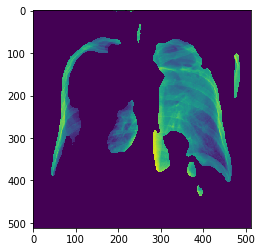

In [223]:
plt.imshow(x)

In [192]:
image.img_to_array

<function keras.preprocessing.image.img_to_array(img, data_format=None, dtype=None)>

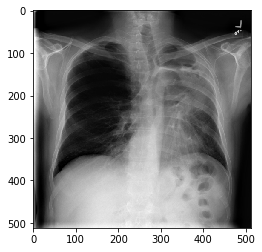

In [163]:
plt.imshow(img, cmap = plt.cm.gray)

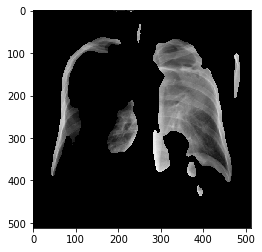

In [164]:
plt.imshow(img2, cmap = plt.cm.gray)

In [158]:
import matplotlib.pyplot as plt

filename = os.listdir('data/raw_data/train_dcm')[13]
pid, fileext = os.path.splitext(os.path.basename(filename))
img = pydicom.dcmread('data/raw_data/train_dcm/'+filename).pixel_array
img = cv2.resize(img, (512, 512))
segm_ret = segmentation_model.predict(image_to_train(img), \
                                      verbose=0)
img2 = cv2.bitwise_and(img, img, mask=train_to_image(segm_ret))

In [159]:
filename

'3d30e71a-b167-472f-80d9-d5d0a814a8ad.dcm'

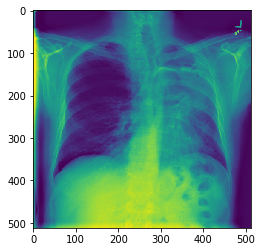

In [160]:
plt.imshow(img)

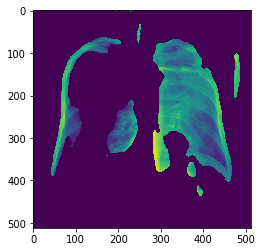

In [161]:
plt.imshow(img2)

In [42]:
image.img_to_array(img).shape

(1024, 1024, 3)

In [27]:
os.path.join('data/raw_data/train', "*.dcm")

'data/raw_data/train/*.dcm'